In [11]:
import geopandas as gpd

In [23]:
import pandas as pd
final_df=pd.read_csv('../Dataset/final_df.csv')

In [ ]:
# Load India international boundary
india_boundary = gpd.read_file(
    "../Dataset/boundary/India_Country_Boundary.shp"
)

# Load district polygons
districts = gpd.read_file(
    "../Dataset/GeoJSON/india_district.geojson"
)

final_df = pd

In [20]:
print(india_boundary.crs)
print(districts.crs)


EPSG:3857
EPSG:3857


In [18]:
districts = districts.to_crs(india_boundary.crs)

In [15]:
districts["geometry"] = districts["geometry"].buffer(0)
india_boundary["geometry"] = india_boundary["geometry"].buffer(0)


In [16]:
india_border_geom = india_boundary.union_all()


In [17]:
districts["is_border"] = districts["geometry"].intersects(
    india_border_geom
)


Remove false coastal districts

In [21]:
coastal_islands = [
    "Andaman Islands",
    "Nicobar Islands",
    "Lakshadweep"
]

districts.loc[
    districts["NAME_2"].isin(coastal_islands),
    "is_border"
] = False


In [22]:
border_map = (
    districts[["NAME_1", "NAME_2", "is_border"]]
    .rename(columns={
        "NAME_1": "state",
        "NAME_2": "district"
    })
)


In [24]:
def normalize_name(x):
    return (
        x.lower()
        .replace("&", "and")
        .replace("-", " ")
        .replace(".", "")
        .strip()
    )

border_map["district_norm"] = border_map["district"].apply(normalize_name)
final_df["district_norm"] = final_df["district"].apply(normalize_name)


In [25]:
final_df = final_df.merge(
    border_map[["district_norm", "is_border"]],
    on="district_norm",
    how="left"
)


In [26]:
final_df["is_border"] = final_df["is_border"].fillna(False)


C:\Users\Soumyadeep Basu\AppData\Local\Temp\ipykernel_19472\2936423898.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df["is_border"] = final_df["is_border"].fillna(False)


In [28]:
# Merge all boundary geometries
india_geom = india_boundary.unary_union

# Extract boundary line (this is the key fix)
india_border_line = india_geom.boundary


C:\Users\Soumyadeep Basu\AppData\Local\Temp\ipykernel_19472\1380474568.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_geom = india_boundary.unary_union


In [45]:
districts["is_border"] = districts["geometry"].intersects(
    india_border_line
)


<Axes: >

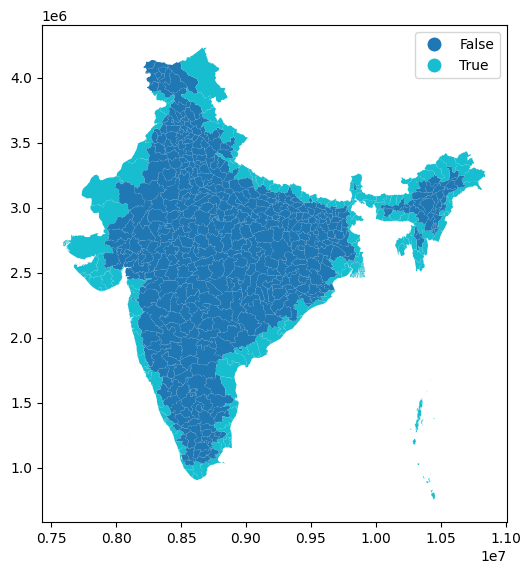

In [47]:
districts.plot(
    column="is_border",
    figsize=(6, 8),
    legend=True
)

In [49]:
districts["is_border"].value_counts()

is_border
False    443
True     151
Name: count, dtype: int64